In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
from edes.modules.detection.detection_utils import plot, plot_ax, plot_ax_errbar, plot_errbar, big_plt_font
from scipy.constants import e, m_e, k, c
import scipy.constants as spc

mu_B = spc.physical_constants['Bohr magneton'][0]
big_plt_font()

In [2]:
## Cyclotron radius 
# Given parameters
f_c     = 20e9         # cyclotron frequency [Hz]
T = 1000
v_perp  = np.sqrt(k*T/m_e)          # perpendicular speed [m/s] (example)
E_field = 0.55*1e3 # electric field [V/m] (example)

# Derived quantities
omega_c = 2 * np.pi * f_c
B_field = (m_e * omega_c) / e

# Radii calculations
r_cyclotron = (m_e * v_perp) / (e * B_field)
v_drift     = E_field / B_field
r_magnetron = v_drift / omega_c

# Display results
print(f"Cyclotron frequency f_c  = {f_c/1e9:.1f} GHz")
print(f"Derived magnetic field B  = {B_field:.2f} T")
print(f"Cyclotron radius r_c      = {r_cyclotron*1e6:.2f} um")
print(f"Drift velocity v_d        = {v_drift:.3e} m/s")
print(f"Magnetron radius r_m      = {r_magnetron*1e6:.2f} um")

Cyclotron frequency f_c  = 20.0 GHz
Derived magnetic field B  = 0.71 T
Cyclotron radius r_c      = 0.98 um
Drift velocity v_d        = 7.698e+02 m/s
Magnetron radius r_m      = 0.01 um


In [3]:
eps = 3.747 
f0 = 30e6
c/np.sqrt(eps)/f0/4

1.2906176805324885

C:\Users\zhizh\AppData\Local\Temp\ipykernel_9896\1011662600.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels([f'{i*2*np.pi*1e9*m_e/e:.1f}' for i in ax[0].get_xticks()])
C:\Users\zhizh\AppData\Local\Temp\ipykernel_9896\1011662600.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels([f'$10^{(np.log10(i/1e-6)):.0f}$' for i in ax[1].get_yticks()])


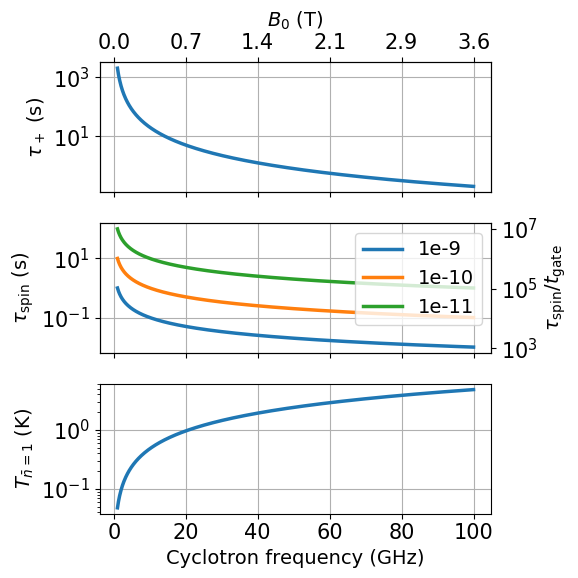

In [43]:
f_c = np.linspace(1, 100, 1000)*1e9
omega_c = f_c*2*np.pi

fig, ax = plt.subplots(nrows=3, figsize=(6,6), sharex=True)
tau = 4*np.pi*spc.epsilon_0*3*spc.m_e*spc.c**3/4/spc.e**2/omega_c**2
plot_ax(ax[0], omega_c/1e9/2/np.pi, tau, ylabel=r'$\tau_+$ (s)')
ax[0].set_yscale('log')

ax0 = ax[0].twiny() 
ax0.plot(f_c/1e9, tau, alpha=0)
ax0.set_xticklabels([f'{i*2*np.pi*1e9*m_e/e:.1f}' for i in ax[0].get_xticks()])
ax0.set_xlabel(r'$B_0$ (T)')

for B_field_stab in [1e-9, 1e-10, 1e-11]:
    #B_field_stab = 1e-9
    coherence_time = 1/(f_c*B_field_stab)
    plot_ax(ax[1], f_c/1e9, coherence_time, label=f'1e{np.log10(B_field_stab):.0f}', ylabel=r'$\tau_{\rm{spin}}$ (s)')
ax1 = ax[1].twinx() 
ax[1].set_yscale('log')
ax[1].legend()
ax1.plot(f_c/1e9, coherence_time, alpha=0) 
ax1.set_yticklabels([f'$10^{(np.log10(i/1e-6)):.0f}$' for i in ax[1].get_yticks()])
ax1.set_ylabel(r'$\tau_{\rm{spin}}/t_{\rm{gate}}$')


n = 1 
T = n*spc.hbar*omega_c/spc.k
plot_ax(ax[2], f_c/1e9, T, xlabel='Cyclotron frequency (GHz)', ylabel=r'$T_{\bar{n}=1}$ (K)')
ax[2].set_yscale('log')

plt.tight_layout()

[]

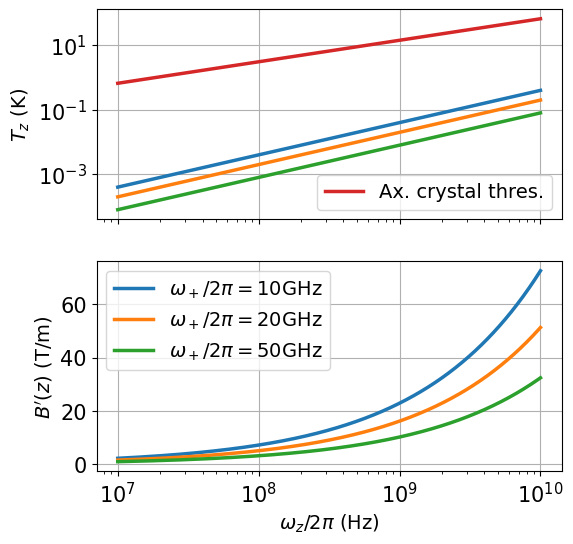

In [42]:
fig, ax = plt.subplots(nrows=2, figsize=(6,6), sharex=True)
grad_B = 90
fz = np.logspace(7, 10, 1000)
omega_z = 2*np.pi*fz 
T00 = 0.4*omega_z/(2*np.pi*10e9)
T01 = 0.4*omega_z/(2*np.pi*20e9)
T02 = 0.4*omega_z/(2*np.pi*50e9)
sigma0 = np.sqrt(spc.k*T00/m_e/omega_z**2)
sigma1 = np.sqrt(spc.k*T01/m_e/omega_z**2)
sigma2 = np.sqrt(spc.k*T02/m_e/omega_z**2)
#t_readout = 3*sigma / (grad_B*mu_B/2/m_e/omega_z)
t_readout = 20e-6
grad_B0 = 3*sigma0 / (t_readout*mu_B/2/m_e/omega_z)
grad_B1 = 3*sigma1 / (t_readout*mu_B/2/m_e/omega_z)
grad_B2 = 3*sigma2 / (t_readout*mu_B/2/m_e/omega_z)
Tc = (e**2/2/np.pi/spc.epsilon_0)**(2/3)*(m_e*omega_z**2)**(1/3)/spc.k
plot_ax(ax[0], fz, T00)#, label=r'$\omega_+/2\pi = 10$GHz')
plot_ax(ax[0], fz, T01)#, label=r'$\omega_+/2\pi = 20$GHz')
plot_ax(ax[0], fz, T02)#, label=r'$\omega_+/2\pi = 50$GHz')
plot_ax(ax[0], fz, Tc, ylabel=r'$T_z$ (K)', label='Ax. crystal thres.')

plot_ax(ax[1], fz, grad_B0, label=r'$\omega_+/2\pi = 10$GHz')
plot_ax(ax[1], fz, grad_B1, label=r'$\omega_+/2\pi = 20$GHz')
plot_ax(ax[1], fz, grad_B2, label=r'$\omega_+/2\pi = 50$GHz', xlabel=r'$\omega_z/2\pi$ (Hz)', ylabel=r"$B'(z)$ (T/m)")

ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].legend()
ax[1].legend()
ax[0].set_yscale('log')
plt.plot()

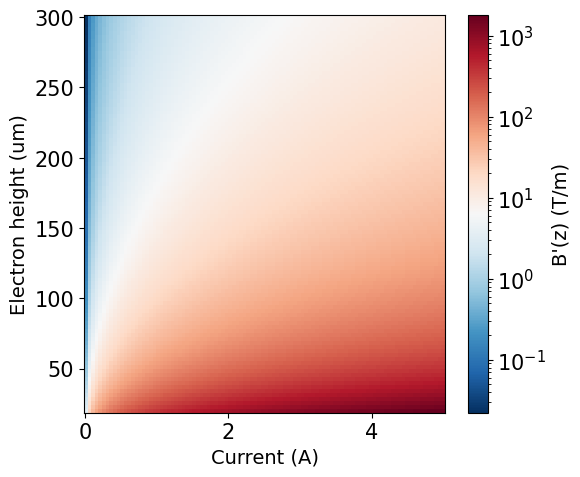

In [70]:
from matplotlib.colors import LogNorm

I_drive = np.linspace(10e-3, 5, 100)
h = np.linspace(20e-6, 300e-6, 100)
d = 10e-6
X, Y = np.meshgrid(I_drive, h)
B_grad = spc.mu_0/4/np.pi * 2 * X * Y / (Y**2+d**2)**(3/2)

plt.figure(figsize=(6, 5))
pcm = plt.pcolormesh(X, Y*1e6, B_grad, cmap='RdBu_r', shading='auto', norm=LogNorm())

# Add a colorbar
plt.colorbar(pcm, label="B'(z) (T/m)")

# Set labels and title
plt.xlabel('Current (A)')
plt.ylabel('Electron height (um)')
#plt.title("B'(z) (T/m)")
#plt.xscale('log')
#plt.clim(-1, 200)

plt.tight_layout()
plt.show()

In [20]:
t_readout

1.6123425388556524e-05

In [71]:
1/(65/1.6)

0.024615384615384615

In [74]:
100e-6 * 1 * 0.36

3.6e-05

In [73]:
10*2*np.pi*1e9*m_e/e

0.357238675287821

In [75]:
(110-95)/95

0.15789473684210525

In [77]:
(115-95)/95

0.21052631578947367

In [78]:
(125-115)/115

0.08695652173913043